<a href="https://colab.research.google.com/github/Jeonyujeong/RottenFruitsModel/blob/master/yolo_cherry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls -al "/content/gdrive/My Drive/darknet"

#2. Install cuDNN

Unzip the cuDNN package

In [3]:
!tar -xzvf /content/gdrive/My\ Drive/darknet/cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.solitairetheme8 -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.5
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 6
#define CUDNN_PATCHLEVEL 5
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


#3. Load Darknet

In [4]:
!mkdir darknet
!cp -r "/content/gdrive/My Drive/darknet/cfg" /content/darknet
!cp -r "/content/gdrive/My Drive/darknet/data" /content/darknet
!cp -r "/content/gdrive/My Drive/darknet/weights" /content/darknet
!cp "/content/gdrive/My Drive/darknet/bin/darknet" /content/darknet

In [5]:
# !pwd
%cd darknet
!chmod +x ./darknet
!pwd

/content/darknet
/content/darknet


## Some Utils
Let's add some utils that maybe can be useful.

These utils are:
* imgShow() - Will help us to show an image in the remote VM
* download() - Will allow you to get some file from your notebook in case you need to
* upload() - You can upload files to your current folder on the remote VM.

Thanks to [Ivan Goncharov](https://twitter.com/Ivangrov) for these helpers!

In [6]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

# Yolo Test

In [ ]:
!./darknet detect cfg/yolov3.cfg weights/yolov3.weights data/eagle.jpg
imShow('predictions.jpg')

# Data set 가져오기

가져오는데 시간이 오래 걸려요.

In [12]:
%cd darknet

/content/darknet


In [13]:
!git clone https://github.com/RottenFruitsOSS/DataSet.git

Cloning into 'DataSet'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 5274 (delta 0), reused 0 (delta 0), pack-reused 5273
Receiving objects: 100% (5274/5274), 3.58 GiB | 6.45 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (5213/5213), done.


```
content/
    Dataset/
        train/
        test/
```

# 4. Custom Yolo

## train 

 yolo_model_data 폴더안에 있는 파일
* custom_data.data 
* custome-train-yolo.cfg
* classes.names 
* custom-train-yolo_last.weights
* train.txt
* test.txt



In [ ]:
# DarknetSetUp.ipynb에서 weight 파일에 저장되어 있으면 안해도 됨.
# darknet53.conv.74 : darknet에서 이미 학습되어진 모델
# !wget https://pjreddie.com/media/files/darknet53.conv.74

In [ ]:
!mkdir custom
%cd custom

!wget https://raw.githubusercontent.com/RottenFruitsOSS/RottenFruitsModel/master/yolo_model_data/custom_data.data
!wget https://raw.githubusercontent.com/RottenFruitsOSS/RottenFruitsModel/master/yolo_model_data/custom-train-yolo.cfg
!wget https://github.com/RottenFruitsOSS/RottenFruitsModel/raw/master/yolo_model_data/classes.names
!wget https://github.com/RottenFruitsOSS/RottenFruitsModel/raw/master/yolo_model_data/custom-train-yolo_last.weights

!wget https://raw.githubusercontent.com/RottenFruitsOSS/RottenFruitsModel/master/yolo_model_data/test.txt
!wget https://raw.githubusercontent.com/RottenFruitsOSS/RottenFruitsModel/master/yolo_model_data/train.txt
%cd ../
# !cp "/content/gdrive/My Drive/darknet/custom/custom_data.data" ./custom
# !cp "/content/gdrive/My Drive/darknet/custom/custom-train-yolo.cfg" ./custom

```
custom/
    custom_data.data
    custom-train-yolo.cfg
    classes.names
    custom-train-yolo_last.weights
    train.txt
    test.txt
```

* 학습하기 
```
./darknet detector train ".data경로" ".cfg경로" "weights경로"
```

* weights 파일 변경 가능
  * yolo3.weigths
  * custom-train-yolo_last.weigths
  * darknet53.conv.74


In [35]:
!pwd

/content/darknet


In [45]:
!./darknet detector train '/content/darknet/custom/custom_data.data' '/content/darknet/custom/custom-train-yolo.cfg' '/content/gdrive/My Drive/darknet/backup/custom-train-yolo_4000.weights' -dont_show 

custom-train-yolo
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 1

In [46]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg custom/custom-train-yolo_last.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

* test 하기
```
./darknet detector test "data경로" "cfg경로" "weights경로" "이미지경로"
```

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

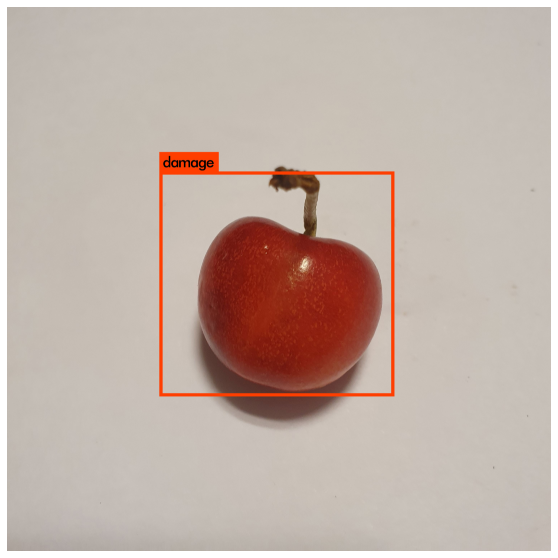

In [ ]:
!./darknet detector test custom/custom_data.data custom/custom-train-yolo.cfg custom/custom-train-yolo_last.weights data/damage.jpg
imShow('predictions.jpg')